<a href="https://colab.research.google.com/github/DanielFirman/bank_churn/blob/main/trend_penjualan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
st = pd.read_csv('shopping_trends.csv')
st.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [11]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [12]:
st.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [13]:
st.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [14]:
st['Category'].value_counts()

,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


In [20]:
st['Gender'].value_counts()

,count
Gender,
Male,2652
Female,1248


In [22]:
# Total pendapatan
total_pendapatan = st['Purchase Amount (USD)'].sum()
print(f'Total Pendapatan: ${total_pendapatan}')

# Rata-rata pembelian
rata_rata_pembelian = st['Purchase Amount (USD)'].mean()
print(f'Rata-Rata Pembelian: ${rata_rata_pembelian:.2f}')

# Pendapatan berdasarkan kategori
pendapatan_per_kategori = st.groupby('Category')['Purchase Amount (USD)'].sum()
print(pendapatan_per_kategori.sort_values(ascending=False))


Total Pendapatan: $233081
Rata-Rata Pembelian: $59.76
Category
Clothing       104264
Accessories     74200
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


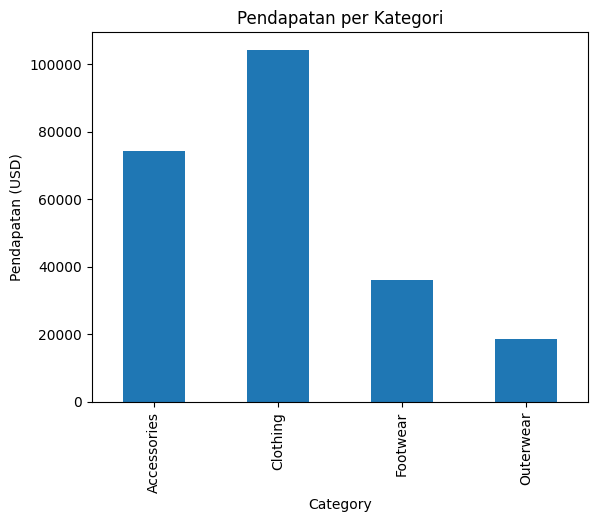

In [29]:
pendapatan_per_kategori.plot(kind='bar', title='Pendapatan per Kategori')
plt.ylabel('Pendapatan (USD)')
plt.show()


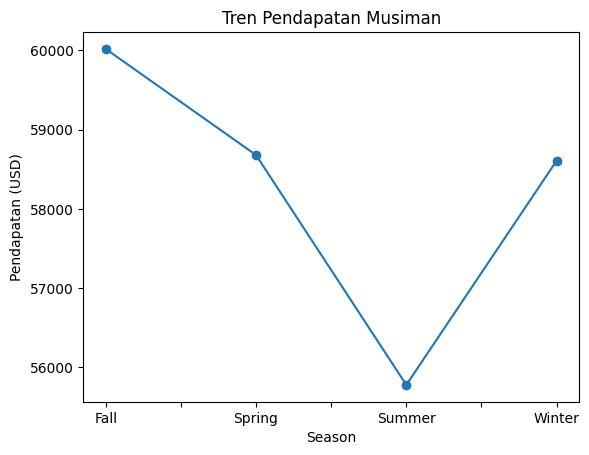

In [30]:
pendapatan_musim.plot(kind='line', title='Tren Pendapatan Musiman', marker='o')
plt.ylabel('Pendapatan (USD)')
plt.show()


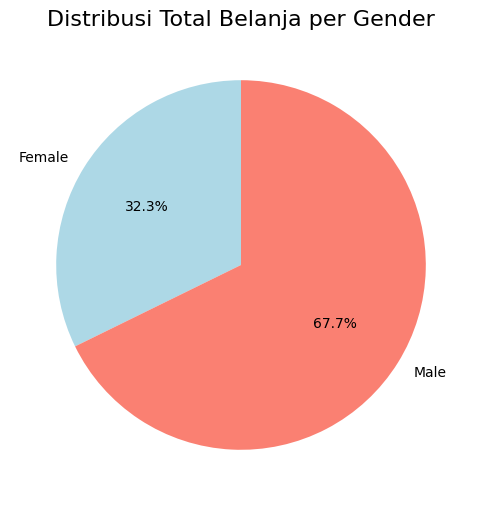

In [39]:
total_belanja_per_gender = st.groupby('Gender')['Purchase Amount (USD)'].sum()

plt.figure(figsize=(8, 6))
plt.pie(total_belanja_per_gender, labels=total_belanja_per_gender.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])

plt.title('Distribusi Total Belanja per Gender', fontsize=16)

plt.show()

In [24]:
status_langganan = st['Subscription Status'].value_counts(normalize=True) * 100
print(status_langganan)

# Pengeluaran rata-rata pelanggan berlangganan vs tidak
pengeluaran_langganan = st.groupby('Subscription Status')['Purchase Amount (USD)'].mean()
print(pengeluaran_langganan)


Subscription Status
No     73.0
Yes    27.0
Name: proportion, dtype: float64
Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64


In [25]:
print(st['Payment Method'].value_counts())  # Distribusi metode pembayaran

# Metode pembayaran per kategori
pembayaran_per_kategori = st.groupby(['Category', 'Payment Method']).size()
print(pembayaran_per_kategori)


Payment Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64
Category     Payment Method
Accessories  Bank Transfer     198
             Cash              200
             Credit Card       245
             Debit Card        195
             PayPal            199
             Venmo             203
Clothing     Bank Transfer     291
             Cash              281
             Credit Card       319
             Debit Card        286
             PayPal            274
             Venmo             286
Footwear     Bank Transfer      98
             Cash              105
             Credit Card        84
             Debit Card         91
             PayPal            113
             Venmo             108
Outerwear    Bank Transfer      45
             Cash               62
             Credit Card        48
             Debit Card         61
             PayPal             52


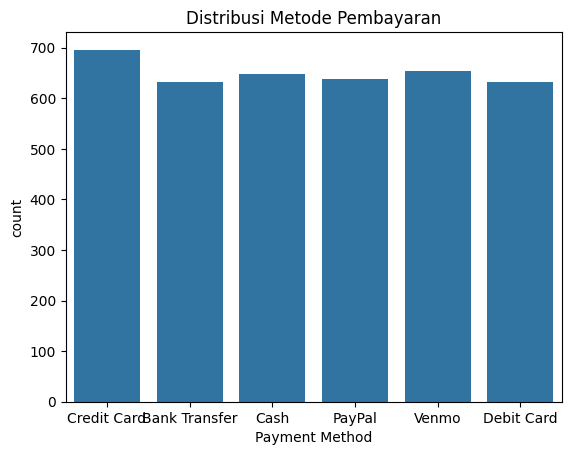

In [33]:
sns.countplot(x='Payment Method', data=st)
plt.title('Distribusi Metode Pembayaran')
plt.show()


In [27]:
print(st['Shipping Type'].value_counts())

# Korelasi pengiriman dengan ulasan
korelasi_pengiriman = st.groupby('Shipping Type')['Review Rating'].mean()
print(korelasi_pengiriman)


Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64
Shipping Type
2-Day Shipping    3.761085
Express           3.776935
Free Shipping     3.717926
Next Day Air      3.720833
Standard          3.817737
Store Pickup      3.706462
Name: Review Rating, dtype: float64


In [28]:
penggunaan_diskon = st['Discount Applied'].value_counts(normalize=True) * 100
print(penggunaan_diskon)

# Efektivitas promo
efektivitas_promo = st.groupby('Promo Code Used')['Purchase Amount (USD)'].mean()
print(efektivitas_promo)


Discount Applied
No     57.0
Yes    43.0
Name: proportion, dtype: float64
Promo Code Used
No     60.130454
Yes    59.279070
Name: Purchase Amount (USD), dtype: float64
